In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
df = pd.read_csv('ML_3.csv')
df.head(3)

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g


In [12]:
df.keys()

Index(['Unnamed: 0', 'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
       'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 12 columns):
Unnamed: 0    19020 non-null int64
fLength       19020 non-null float64
fWidth        19020 non-null float64
fSize         19020 non-null float64
fConc         19020 non-null float64
fConc1        19020 non-null float64
fAsym         19020 non-null float64
fM3Long       19020 non-null float64
fM3Trans      19020 non-null float64
fAlpha        19020 non-null float64
fDist         19020 non-null float64
class         19020 non-null object
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ MB


In [14]:
df.isnull().sum()

Unnamed: 0    0
fLength       0
fWidth        0
fSize         0
fConc         0
fConc1        0
fAsym         0
fM3Long       0
fM3Trans      0
fAlpha        0
fDist         0
class         0
dtype: int64

In [15]:
df.describe()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,9509.500000,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,5490.745396,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,0.000000,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,4754.750000,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,9509.500000,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,14264.250000,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,19019.000000,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [16]:
X= df.drop('class',axis=1)
y=df['class']

In [18]:
print(X)

       Unnamed: 0   fLength    fWidth   fSize   fConc  fConc1     fAsym  \
0               0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   
1               1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   
2               2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410   
3               3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   
4               4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   
5               5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   
6               6   48.2468   17.3565  3.0332  0.2529  0.1515    8.5730   
7               7   26.7897   13.7595  2.5521  0.4236  0.2174   29.6339   
8               8   96.2327   46.5165  4.1540  0.0779  0.0390  110.3550   
9               9   46.7619   15.1993  2.5786  0.3377  0.1913   24.7548   
10             10   62.7766   29.9104  3.3331  0.2475  0.1261  -33.9065   
11             11   18.8562   16.4600  2.4385  0.5282  0.2933   25.1269   
12             12   45.63

In [9]:
X.shape

(19020, 11)

In [10]:
y.shape

(19020,)

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=5)

In [12]:
X_train.shape

(13314, 11)

In [13]:
X_test.shape

(5706, 11)

In [14]:
y_train.shape

(13314,)

In [15]:
y_test.shape

(5706,)

Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model1 = LogisticRegression()
Lrmodel=model1.fit(X_train,y_train)
yp1=model1.predict(X_test)
 

C:\Users\RANVEER\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
logistic_acc=accuracy_score(y_test,yp1)
print(logistic_acc)

0.9730108657553452


In [19]:
print("Confusion matrix\n",confusion_matrix(y_test,yp1))

Confusion matrix
 [[3570   95]
 [  59 1982]]


In [20]:
print("Classification Report\n",classification_report(y_test,yp1))

Classification Report
               precision    recall  f1-score   support

           g       0.98      0.97      0.98      3665
           h       0.95      0.97      0.96      2041

    accuracy                           0.97      5706
   macro avg       0.97      0.97      0.97      5706
weighted avg       0.97      0.97      0.97      5706



SVM

In [21]:
from sklearn import svm

In [22]:
svm_clf = svm.SVC(kernel='linear') 
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

In [23]:
svm_acc=svm_clf.score(X_test,y_test)
print(svm_acc)

0.9998247458815283


KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
 

In [25]:
model2=KNeighborsClassifier(n_neighbors=50)
knn=model2.fit(X_train,y_train)
yp2=model2.predict(X_test)

In [26]:
knn_acc=accuracy_score(y_test,yp2)
print(knn_acc)

0.9998247458815283


In [27]:
print("Confusion matrix",confusion_matrix(y_test,yp2))

Confusion matrix [[3665    0]
 [   1 2040]]


In [28]:
print("Classification Report",classification_report(y_test,yp2))

Classification Report               precision    recall  f1-score   support

           g       1.00      1.00      1.00      3665
           h       1.00      1.00      1.00      2041

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='entropy',max_depth=2)
dt=model3.fit(X_train,y_train)

[Text(167.4, 163.07999999999998, 'X[0] <= 12331.5\nentropy = 0.933\nsamples = 13314\nvalue = [8667, 4647]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 8667\nvalue = [8667, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 4647\nvalue = [0, 4647]')]

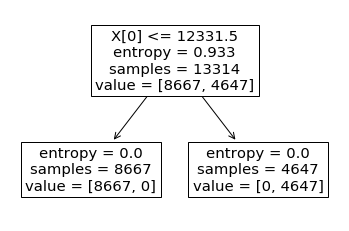

In [30]:
from sklearn import tree
tree.plot_tree(model3)

In [31]:
yp3=dt.predict(X_test)

In [32]:
dt_acc=accuracy_score(y_test,yp3)

In [33]:
print("Confusion matrix\n",confusion_matrix(y_test,yp3))

Confusion matrix
 [[3665    0]
 [   0 2041]]


In [34]:
print("Classification Report\n",classification_report(y_test,yp3))

Classification Report
               precision    recall  f1-score   support

           g       1.00      1.00      1.00      3665
           h       1.00      1.00      1.00      2041

    accuracy                           1.00      5706
   macro avg       1.00      1.00      1.00      5706
weighted avg       1.00      1.00      1.00      5706



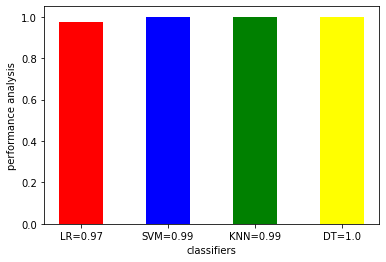

In [35]:
plt.bar([1,2,3,4],[logistic_acc,svm_acc,knn_acc,dt_acc],width=0.5,tick_label=['LR=0.97','SVM=0.99','KNN=0.99','DT=1.0'],color=['red','blue','green','yellow'])
plt.xlabel('classifiers')
plt.ylabel('performance analysis')
plt.show()